# **1 - Perkenalan**



---



Bab pengenalan harus diisi dengan identitas, query yang telah kalian buat pada Google Cloud Platform!, dan objective yang ingin dicapai.

Nama : Andik Al Fauzi

Batch : FTDS-RMT-018

Dataset : [bigquery-public-data.ml_datasets.census_adult_income](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=ml_datasets&t=census_adult_income&page=table&project=abiding-state-376306&ws=!1m5!1m4!4m3!1sbigquery-public-data!2sml_datasets!3scensus_adult_income)

Objective : Membuat model *Classification* menggunakan *Logistic Regression* dan SVM untuk memprediksi *income bracket* berdasarkan instruksi dari [Graded Challenge-2](https://github.com/H8-Assignments-Bay/p1-ftds018-rmt-g2-andik-alfauzi)

# **2 - Query SQL**



---



Tulis query yang telah dibuat untuk mengambil data dari Google Cloud Platform di bagian ini.





Buatlah query dengan kriteria sebagai berikut:
1. Pilih HANYA kolom `age, workclass, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country, dan income_bracket`.
2. Pilih semua workclass, kecuali ' ?'.

3. Pilih hours_per_week kurang dari 100.

4. Limit jumlah data menjadi sebanyak nomor batch dikali dengan tahun lahir kalian. ex: Batch 10 dan lahir tahun 1995, 10 x 1995 = 19950.

In [63]:
# Query SQL from Big Query

# SELECT age, workclass, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country, income_bracket
# FROM `bigquery-public-data.ml_datasets.census_adult_income`
# WHERE workclass != ' ?' AND hours_per_week < 100

In [64]:
# Check limit data sesuai rubrik
batch = 18
tahunLahir = 1990
limitData = batch*tahunLahir
print('Limit data yang seharusnya digunakan : ', limitData)

Limit data yang seharusnya digunakan :  35820


# **3 - Import Libraries**



---



Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [65]:
# Importing libraries
import pandas as pd
import numpy as np

# Model Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Model Preprocessing libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, classification_report, accuracy_score

# Importing Libraries
import pickle
import json

# Warning Library
import warnings
warnings.filterwarnings('ignore')

# **4 - Data Loading**



---



Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [66]:
# Load CSV hasil export dari Big Query
data = pd.read_csv('/content/drive/MyDrive/h8dsft_P1G2_Andik_Al_Fauzi/h8dsft_P1G2_Andik_Al_Fauzi.csv')

In [67]:
# Create copy data to make sure the original is untouchable
copyData = data.copy()

In [68]:
# Beginning insight
copyData

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,77,Private,9th,5,Married-civ-spouse,Priv-house-serv,Wife,Black,Female,0,0,10,United-States,<=50K
2,38,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,24,Haiti,<=50K
3,28,Private,9th,5,Married-civ-spouse,Protective-serv,Wife,Black,Female,0,0,40,United-States,<=50K
4,37,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,Black,Female,0,0,48,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30720,46,Private,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,40,India,<=50K
30721,45,Private,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,40,Philippines,<=50K
30722,32,Private,Some-college,10,Married-civ-spouse,Sales,Other-relative,Asian-Pac-Islander,Female,0,0,40,Greece,<=50K
30723,30,Self-emp-not-inc,Some-college,10,Never-married,Sales,Other-relative,Asian-Pac-Islander,Male,0,2258,40,South,<=50K


ada `30,725` data baris data dan `14` kolom

Limit data yang seharusnya saya gunakan sebanyak `35,820` sedangkan dataset tersedia hanya sebanyak `30,725` jadi saya akan menggunakan semua dataset.

# **5 - Exploratory Data Analysis (EDA)**


---



Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [69]:
# Check data sudah sesuai instruksi assignment
copyData.loc[(copyData['workclass'] == '%?%')]

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket


Data sudah sesuai instruksi assignment dimana workclass sudah tidak ada data dengan nilai ' ?'

In [70]:
# 10 data pertama dari dataset
copyData.head(10)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,77,Private,9th,5,Married-civ-spouse,Priv-house-serv,Wife,Black,Female,0,0,10,United-States,<=50K
2,38,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,24,Haiti,<=50K
3,28,Private,9th,5,Married-civ-spouse,Protective-serv,Wife,Black,Female,0,0,40,United-States,<=50K
4,37,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,Black,Female,0,0,48,United-States,<=50K
5,45,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,>50K
6,55,Private,9th,5,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,23,United-States,<=50K
7,27,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,37,Portugal,<=50K
8,31,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
9,30,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,Portugal,<=50K


In [71]:
# 10 data terakhir dari dataset
copyData.tail(10)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
30715,23,Private,Some-college,10,Never-married,Adm-clerical,Other-relative,Asian-Pac-Islander,Female,0,0,24,Vietnam,<=50K
30716,22,Private,Some-college,10,Never-married,Tech-support,Other-relative,Asian-Pac-Islander,Female,0,0,32,United-States,<=50K
30717,25,Private,Some-college,10,Never-married,Craft-repair,Other-relative,Asian-Pac-Islander,Female,0,0,40,Cambodia,<=50K
30718,22,Private,Some-college,10,Never-married,Craft-repair,Other-relative,Asian-Pac-Islander,Female,0,0,40,Vietnam,<=50K
30719,48,Private,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,40,Cambodia,>50K
30720,46,Private,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,40,India,<=50K
30721,45,Private,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,40,Philippines,<=50K
30722,32,Private,Some-college,10,Married-civ-spouse,Sales,Other-relative,Asian-Pac-Islander,Female,0,0,40,Greece,<=50K
30723,30,Self-emp-not-inc,Some-college,10,Never-married,Sales,Other-relative,Asian-Pac-Islander,Male,0,2258,40,South,<=50K
30724,20,Self-emp-not-inc,Some-college,10,Never-married,Prof-specialty,Other-relative,Asian-Pac-Islander,Female,0,0,20,South,<=50K


Berikut adalah masing-masing 10 data pertama dan 10 data terakhir dari dataset

In [72]:
# Describe data
copyData.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30725.0,38.439512,13.119665,17.0,28.0,37.0,47.0,90.0
education_num,30725.0,10.129699,2.562702,1.0,9.0,10.0,13.0,16.0
capital_gain,30725.0,1105.785094,7497.027762,0.0,0.0,0.0,0.0,99999.0
capital_loss,30725.0,88.889959,405.613208,0.0,0.0,0.0,0.0,4356.0
hours_per_week,30725.0,40.946461,11.987385,1.0,40.0,40.0,45.0,99.0


Data `age` yang diambil memiliki rata-rata 37 dengan `hours_per_week` maximal di angka `99.00` dengan `capital_loss` di angka `4,356`

In [73]:
# Check missing value
copyData.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_bracket    0
dtype: int64

Tidak ada *missing value* dalam data

In [74]:
# Check banyak data berdasarkan sex
copyData.sex.value_counts()

 Male      20793
 Female     9932
Name: sex, dtype: int64

Data sensus yang dilakukan mayoritas adalah dengan `Sex` type *Male* sebanyak `20,793` sementara *Female* sebanyak *9,932* atau **67.67%** *Male* berbanding **32.33%** *Female*

In [75]:
# Check banyak data base on income_bracket
copyData.income_bracket.value_counts()

 <=50K    23075
 >50K      7650
Name: income_bracket, dtype: int64

`income_bracket` dengan nilai <=50K ada sebanyak `23.075` dan dengan nilai >=50K ada sebanyak `7,650`. Ada lebih 3x lipat data dengan `income_bracket` <=50K

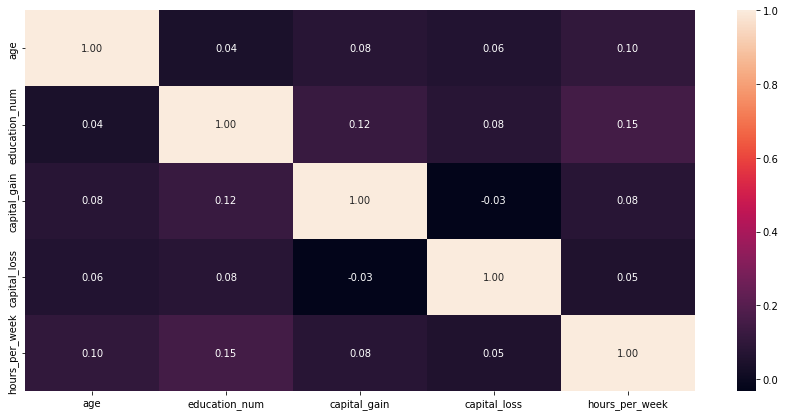

In [76]:
# Check Correlation with visual
plt.figure(figsize=(15, 7))
sns.heatmap(copyData.corr(), annot=True, fmt='.2f')
plt.show()

Dari Visual diatas dapat diartikan untuk `education_num` dan `hours_per_week` memiliki korelasi tertinggi dengan nilai **0.15** dibanding dengan yang lain, yang artinya semakin tinggi tinggi tingkat pendidikannya maka akan semakin besar pendapatan yang dihasilkan dalam 1 minggu.

# **6 - Feature Engineering**



---



Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## 6.1 Split data between X (Features) and y (Target)

In [77]:
# Split between X and y
X = copyData.drop(['income_bracket'], axis=1)
y = copyData['income_bracket']

# Display
X

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States
1,77,Private,9th,5,Married-civ-spouse,Priv-house-serv,Wife,Black,Female,0,0,10,United-States
2,38,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,24,Haiti
3,28,Private,9th,5,Married-civ-spouse,Protective-serv,Wife,Black,Female,0,0,40,United-States
4,37,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,Black,Female,0,0,48,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30720,46,Private,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,40,India
30721,45,Private,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,40,Philippines
30722,32,Private,Some-college,10,Married-civ-spouse,Sales,Other-relative,Asian-Pac-Islander,Female,0,0,40,Greece
30723,30,Self-emp-not-inc,Some-college,10,Never-married,Sales,Other-relative,Asian-Pac-Islander,Male,0,2258,40,South


Berikut adalah data Fitur yang telah didrop kolom `income_bracket`

In [78]:
# Check banyak data masing-masing fitur dan target
print('Banyak data fitur  : ', X.shape)
print('Banyak data target : ', y.shape)

Banyak data fitur  :  (30725, 13)
Banyak data target :  (30725,)


Banyak data antara fitur dan target yaitu `30,725` dengan `13` kolom di data Fitur sementara data Target hanya tersedia `30,725` baris data.

## 6.2 Missing Value Handling

In [79]:
# Check missing value di data fitur
print('Missing Value data Fitur : ')
print(X.isnull().sum())

# Check missing value di data target
print('\nMissing Value data Target : ')
print(y.isnull().sum())

Missing Value data Fitur : 
age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

Missing Value data Target : 
0


Tidak ada missing value didata fitur maupun target

## 6.3 Split data for Train-Set and Test-Set

In [80]:
# Split between data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 19, test_size = 0.2, stratify = y)

# Check banyak data di train dan test
print('Banyak data di X_train : ', X_train.shape)
print('Banyak data di X_test  : ', X_test.shape)
print('Banyak data di y_train : ', y_train.shape)
print('Banyak data di y_test  : ', y_test.shape)

Banyak data di X_train :  (24580, 13)
Banyak data di X_test  :  (6145, 13)
Banyak data di y_train :  (24580,)
Banyak data di y_test  :  (6145,)


Berikut adalah banyak data di masing-masing X_train, X_test, y_train dan y-test dengan pembagian 80% data untuk *Train* dan 20% data untuk *Test*

## 6.4 *Outlier Handling*

In [81]:
# Function Visualization
def diagnostic_plots(df, variable):
  plt.figure(figsize=(16, 5))

  # Histogram
  plt.subplot(1, 2, 1)
  sns.histplot(df[variable], bins=30)
  plt.title('Histogram')

  # Boxplot
  plt.subplot(1, 2, 2)
  sns.boxplot(y = df[variable])
  plt.title('Boxplot')

  plt.show()

In [82]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24580 entries, 25919 to 11198
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             24580 non-null  int64 
 1   workclass       24580 non-null  object
 2   education       24580 non-null  object
 3   education_num   24580 non-null  int64 
 4   marital_status  24580 non-null  object
 5   occupation      24580 non-null  object
 6   relationship    24580 non-null  object
 7   race            24580 non-null  object
 8   sex             24580 non-null  object
 9   capital_gain    24580 non-null  int64 
 10  capital_loss    24580 non-null  int64 
 11  hours_per_week  24580 non-null  int64 
 12  native_country  24580 non-null  object
dtypes: int64(5), object(8)
memory usage: 2.6+ MB


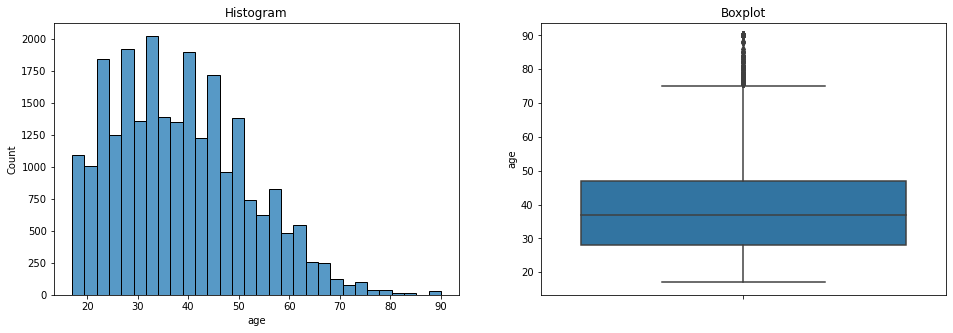

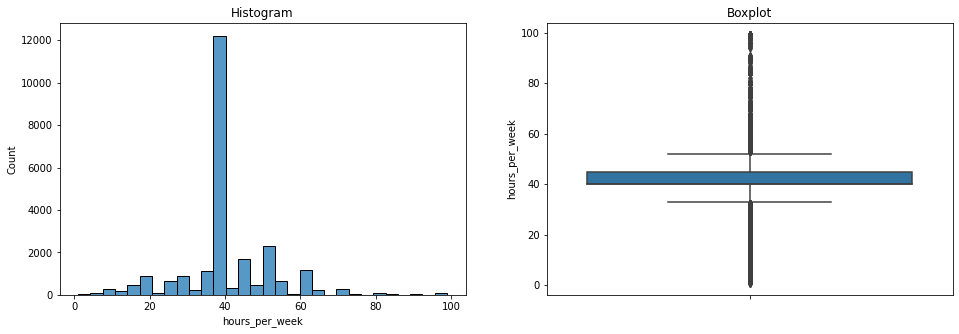

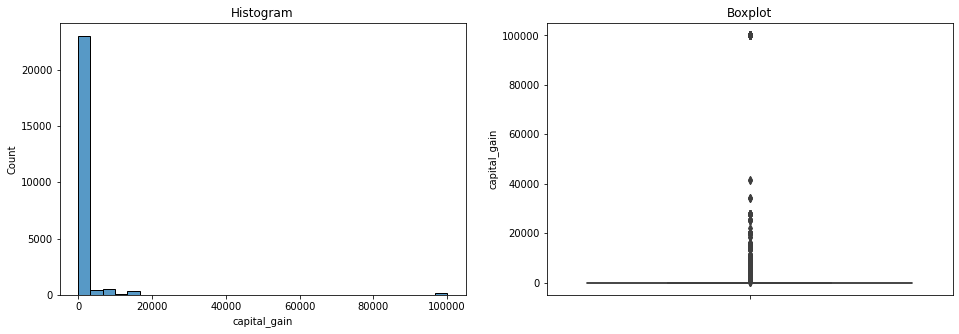

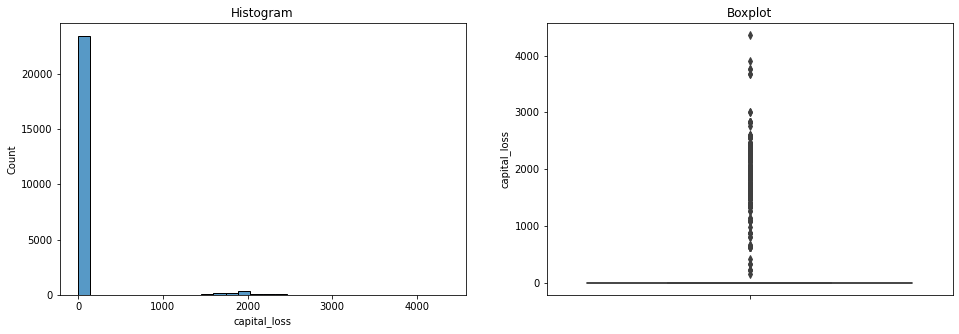



Skewness Value of age :  0.5393707119637231
Skewness Value of hours_per_week :  0.31971119347876503
Skewness Value of capital_gain :  11.771505428418807
Skewness Value of capital_loss :  4.490747502740588


In [83]:
# X_train outlier visualization
diagnostic_plots(X_train, 'age')
diagnostic_plots(X_train, 'hours_per_week')
diagnostic_plots(X_train, 'capital_gain')
diagnostic_plots(X_train, 'capital_loss')
print('\n')
print('Skewness Value of age : ', X_train.age.skew())
print('Skewness Value of hours_per_week : ', X_train.hours_per_week.skew())
print('Skewness Value of capital_gain : ', X_train.capital_gain.skew())
print('Skewness Value of capital_loss : ', X_train.capital_loss.skew())

Distribusi data `age` cenderung normal dengan nilai *skewness* di angka **0.5393707119637231** walaupun cenderung *right extreme skewness*, sedangkan data `hours_per_week` nilai *skewness* **0.31971119347876503**. Jika nilai maximal dari kolom `hours_per_week` adalah 99.00 maka jika dibagi dengan per hari hasilnya adalah `14.14`, oleh karena itu saya masih menganggap ini adalah *outlier* wajar dan akan membiarkan *outlier* tersebut.

## 6.5 *Feature Selection*

In [84]:
# Display data
X_train.head(10)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
25919,48,Local-gov,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,42,United-States
7000,23,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,50,United-States
16480,42,Private,Assoc-voc,11,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,35,United-States
28711,43,State-gov,Some-college,10,Divorced,Exec-managerial,Unmarried,White,Male,0,0,40,United-States
6174,50,Private,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States
6078,24,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
5460,74,Private,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,15,United-States
14682,23,Private,Masters,14,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,1887,50,India
19578,25,Private,Bachelors,13,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States
4194,36,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,7688,0,40,United-States


In [85]:
# Drop unused column
X_train.drop(columns = ['marital_status', 'relationship', 'race'], axis=1, inplace=True)
X_test.drop(columns = ['marital_status', 'relationship', 'race'], axis=1, inplace=True)

# Displaying
X_train

,age,workclass,education,education_num,occupation,sex,capital_gain,capital_loss,hours_per_week,native_country
25919,48,Local-gov,Some-college,10,Protective-serv,Male,0,0,42,United-States
7000,23,Private,HS-grad,9,Machine-op-inspct,Male,0,0,50,United-States
16480,42,Private,Assoc-voc,11,Adm-clerical,Female,0,0,35,United-States
28711,43,State-gov,Some-college,10,Exec-managerial,Male,0,0,40,United-States
6174,50,Private,HS-grad,9,Prof-specialty,Male,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...
19944,39,Federal-gov,Bachelors,13,Tech-support,Female,0,625,40,United-States
1793,25,Private,11th,7,Craft-repair,Male,0,0,40,United-States
6362,39,Private,HS-grad,9,Handlers-cleaners,Male,0,0,40,United-States
26879,19,Private,Some-college,10,Prof-specialty,Male,0,0,11,United-States


Kolom yang didrop adalah `marital_status`, `relationship` dan `race` karena saya beranggapan kolom tersebut tidak ada kaitannya dengan prediksi `income_bracket` sesuai *objective* awal.  

## 6.6 *Split between Numerical Columns and Categorical Columns*

Pada bagian ini kita akan memisahkan data yang berisi numerical dan categorical

In [86]:
# Get Numerical and categorical columns
numCol = X_train.select_dtypes(include=np.number).columns.tolist()
catCol = X_train.select_dtypes(include=['object']).columns.tolist()

# Display
print('Numerical Columns    : ', numCol)
print('Categorical Columns  : ', catCol)

Numerical Columns    :  ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
Categorical Columns  :  ['workclass', 'education', 'occupation', 'sex', 'native_country']


Berikut pembagian data berdasarkan data *numerical* dan *categorical*

In [87]:
# Split train-set and test-set into numerical and categorical
# X_train data
X_trainNum = X_train[numCol]
X_trainCat = X_train[catCol]

# X_test data
X_testNum = X_test[numCol]
X_testCat = X_test[catCol]

Berikut adalah fungsi untuk memisahkan data *numerical* dan *categorical*

## 6.7 *Feature Scaling*

Pada bagian ini kita akan menscaling numerical column dengan *MinMaxScaler*

In [88]:
# Feature scaling with MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_trainNum)

# Appling feature
X_trainNumScaled = scaler.transform(X_trainNum)
X_testNumScaled = scaler.transform(X_testNum)

# Display
X_trainNumScaled

array([[0.42465753, 0.6       , 0.        , 0.        , 0.41836735],
       [0.08219178, 0.53333333, 0.        , 0.        , 0.5       ],
       [0.34246575, 0.66666667, 0.        , 0.        , 0.34693878],
       ...,
       [0.30136986, 0.53333333, 0.        , 0.        , 0.39795918],
       [0.02739726, 0.6       , 0.        , 0.        , 0.10204082],
       [0.1369863 , 0.53333333, 0.02174022, 0.        , 0.39795918]])

berikut adalah hasil scaling dari data X_train dan X_test

In [89]:
print('Banyak data X_train scaling  : ', X_trainNumScaled.shape)

Banyak data X_train scaling  :  (24580, 5)


Banyak data numerical di X_train adalah `24,580` baris dan `5` kolom

## 6.8 *Feature Encoding*

Pada bagian ini kita akan mengencoder data categorical dengan *Label Encoding*

In [90]:
# Check data Categorical
X_trainCat

,workclass,education,occupation,sex,native_country
25919,Local-gov,Some-college,Protective-serv,Male,United-States
7000,Private,HS-grad,Machine-op-inspct,Male,United-States
16480,Private,Assoc-voc,Adm-clerical,Female,United-States
28711,State-gov,Some-college,Exec-managerial,Male,United-States
6174,Private,HS-grad,Prof-specialty,Male,United-States
...,...,...,...,...,...
19944,Federal-gov,Bachelors,Tech-support,Female,United-States
1793,Private,11th,Craft-repair,Male,United-States
6362,Private,HS-grad,Handlers-cleaners,Male,United-States
26879,Private,Some-college,Prof-specialty,Male,United-States


In [91]:
# Check unique value masing-masing kolom
print('Unique Value di kolom Workclass  : ')
print(X_trainCat.workclass.unique())
print('\n Unique Value di kolom Education  : ')
print(X_trainCat.education.unique())
print('\n Unique Value di kolom Occupation  : ')
print(X_trainCat.occupation.unique())
print('\n Unique Value di kolom Sex  : ')
print(X_trainCat.sex.unique())
print('\n Unique Value di kolom Native Country  : ')
print(X_trainCat.native_country.unique())

Unique Value di kolom Workclass  : 
[' Local-gov' ' Private' ' State-gov' ' Self-emp-not-inc' ' Self-emp-inc'
 ' Federal-gov' ' Without-pay' ' Never-worked']

 Unique Value di kolom Education  : 
[' Some-college' ' HS-grad' ' Assoc-voc' ' Masters' ' Bachelors'
 ' 7th-8th' ' 11th' ' Doctorate' ' 10th' ' 9th' ' Prof-school'
 ' Assoc-acdm' ' 12th' ' 5th-6th' ' 1st-4th' ' Preschool']

 Unique Value di kolom Occupation  : 
[' Protective-serv' ' Machine-op-inspct' ' Adm-clerical'
 ' Exec-managerial' ' Prof-specialty' ' Craft-repair' ' Other-service'
 ' Handlers-cleaners' ' Sales' ' Farming-fishing' ' Transport-moving'
 ' Priv-house-serv' ' Tech-support' ' Armed-Forces' ' ?']

 Unique Value di kolom Sex  : 
[' Male' ' Female']

 Unique Value di kolom Native Country  : 
[' United-States' ' India' ' South' ' ?' ' Canada' ' Mexico' ' Jamaica'
 ' Cuba' ' Columbia' ' Hungary' ' Dominican-Republic' ' Hong' ' Ecuador'
 ' Trinadad&Tobago' ' Vietnam' ' Poland' ' Puerto-Rico' ' England'
 ' China' ' El-

In [92]:
# Label Encoding on data train and test
encoder = LabelEncoder()

# Applying encoding X_train
X_trainCat['workclass_enc'] = encoder.fit_transform(X_trainCat['workclass'])
X_trainCat['education_enc'] = encoder.fit_transform(X_trainCat['education'])
X_trainCat['occupation_enc'] = encoder.fit_transform(X_trainCat['occupation'])
X_trainCat['sex_enc'] = encoder.fit_transform(X_trainCat['sex'])
X_trainCat['native_country_enc'] = encoder.fit_transform(X_trainCat['native_country'])

# Applying encoding X_test
X_testCat['workclass_enc'] = encoder.fit_transform(X_testCat['workclass'])
X_testCat['education_enc'] = encoder.fit_transform(X_testCat['education'])
X_testCat['occupation_enc'] = encoder.fit_transform(X_testCat['occupation'])
X_testCat['sex_enc'] = encoder.fit_transform(X_testCat['sex'])
X_testCat['native_country_enc'] = encoder.fit_transform(X_testCat['native_country'])

# Drop column after encoding
X_trainCat.drop(columns = ['workclass',	'education',	'occupation',	'sex',	'native_country'], axis=1, inplace=True)
X_testCat.drop(columns = ['workclass',	'education',	'occupation',	'sex',	'native_country'], axis=1, inplace=True)

# Display
X_trainCat

,workclass_enc,education_enc,occupation_enc,sex_enc,native_country_enc
25919,1,15,11,1,39
7000,3,11,7,1,39
16480,3,8,1,0,39
28711,6,15,4,1,39
6174,3,11,10,1,39
...,...,...,...,...,...
19944,0,9,13,0,39
1793,3,1,3,1,39
6362,3,11,6,1,39
26879,3,15,10,1,39


Berikut adalah data hasil Encoding dengan metode *Label Encoder* di data *Categorical*

## 6.9 *Concate between Numerical and Categorical Column*

In [93]:
# Concate numerical and categorical
X_trainFinal = np.concatenate([X_trainNumScaled, X_trainCat], axis=1)
X_testFinal = np.concatenate([X_testNumScaled, X_testCat], axis=1)

# Create dataframe after concate
X_trainFinalDF = pd.DataFrame(X_trainFinal, columns=[numCol + catCol])

# Display
X_trainFinalDF

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,occupation,sex,native_country
0,0.424658,0.600000,0.00000,0.00000,0.418367,1.0,15.0,11.0,1.0,39.0
1,0.082192,0.533333,0.00000,0.00000,0.500000,3.0,11.0,7.0,1.0,39.0
2,0.342466,0.666667,0.00000,0.00000,0.346939,3.0,8.0,1.0,0.0,39.0
3,0.356164,0.600000,0.00000,0.00000,0.397959,6.0,15.0,4.0,1.0,39.0
4,0.452055,0.533333,0.00000,0.00000,0.397959,3.0,11.0,10.0,1.0,39.0
...,...,...,...,...,...,...,...,...,...,...
24575,0.301370,0.800000,0.00000,0.14348,0.397959,0.0,9.0,13.0,0.0,39.0
24576,0.109589,0.400000,0.00000,0.00000,0.397959,3.0,1.0,3.0,1.0,39.0
24577,0.301370,0.533333,0.00000,0.00000,0.397959,3.0,11.0,6.0,1.0,39.0
24578,0.027397,0.600000,0.00000,0.00000,0.102041,3.0,15.0,10.0,1.0,39.0


Berikut adalah dataframe hasil penggabungan data yang sudah di *scaling* dan *encoding*

# **7 - Model Definition**

---



Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

In [94]:
# Define Logistic Regression
%%time
modelLogReg = LogisticRegression(
    penalty='l2', 
    l1_ratio = 1,
    C = 1,
    solver = 'newton-cholesky'
)

CPU times: user 26 µs, sys: 1 µs, total: 27 µs
Wall time: 31.5 µs


In [95]:
# Define SVM Model with linear kernel
%%time
linearSVM = SVC(
    kernel = 'linear',
    degree = 5,
    C = 0.9,
    gamma = 'scale'
)

CPU times: user 37 µs, sys: 2 µs, total: 39 µs
Wall time: 42.7 µs


In [96]:
# Define SVM Model with rbf kernel
%%time
modelSVMrbf = SVC(
    kernel = 'rbf',
    degree = 3,
    C = 0.6
)

CPU times: user 35 µs, sys: 0 ns, total: 35 µs
Wall time: 39.3 µs


Dalam pendefinisian model ini saya menggunakan data `income_bracket` untuk dibuat prediksinya :
- data[Target] = `income_bracket`
- data[Features] = `age,	education_num,	capital_gain,	capital_loss,	hours_per_week,	workclass,	education,	occupation,	sex,	native_country`

Alasan penggunaan model dan metrics :
1. Karena **Logistic Regression** mudah diaplikasikan ke dalam model dan memiliki hasil prediksi yang baik serta cepat dalam penerapan modelnya terhadap data.
2. Memakai metrics **Accuracy Score** untuk melihat keakuratan masing-masing model yang diaplikasikan

# **8 - Model Training**



---



Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [97]:
# Training model dengan Logistic Regression
%%time
modelLogReg.fit(X_trainFinal, y_train)

CPU times: user 77.7 ms, sys: 26.1 ms, total: 104 ms
Wall time: 75.4 ms


LogisticRegression(C=1, l1_ratio=1, solver='newton-cholesky')

In [98]:
# Training model dengan SVM Linear
%%time
linearSVM.fit(X_trainFinal, y_train)

CPU times: user 35.9 s, sys: 159 ms, total: 36.1 s
Wall time: 36.8 s


SVC(C=0.9, degree=5, kernel='linear')

In [99]:
# Training model with SVM rbf
%%time
modelSVMrbf.fit(X_trainFinal, y_train)

CPU times: user 18.5 s, sys: 30.2 ms, total: 18.6 s
Wall time: 18.7 s


SVC(C=0.6)

In [100]:
# Predicting Train-set with Logistic Regression
%%time
y_trainPredLogReg = modelLogReg.predict(X_trainFinal)

# Predicting Train-set with SVM Linear
y_trainPredSVM = linearSVM.predict(X_trainFinal)

# Predicting Train-set with SVM rbf
y_trainPredSVMrbf = modelSVMrbf.predict(X_trainFinal)

CPU times: user 31.3 s, sys: 133 ms, total: 31.5 s
Wall time: 31.7 s


Cell diatas adalah pemanggilan fungsi prediksi model dengan menggunakan data di *Train-set*

In [101]:
%%time
# Predicting Test-set with Logistic Regression
y_testPredLogReg = modelLogReg.predict(X_testFinal)

# Predicting Test-set with SVM
y_testPredSVM = linearSVM.predict(X_testFinal)

# Predicting Test-set with SVM Polynomial
y_testPredSVMrbf = modelSVMrbf.predict(X_testFinal)

CPU times: user 8.54 s, sys: 85 ms, total: 8.62 s
Wall time: 8.63 s


Cell diatas adalah pemanggilan fungsi prediksi model dengan menggunakan data di *Test-set*

# **9 - Model Evaluation**

---



Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

In [102]:
# Check Model Accuracy Score
print('Accuracy Score Train with Logistic Regression : ', accuracy_score(y_train, y_trainPredLogReg))
print('\nAccuracy Score Test with Logistic Regression : ', accuracy_score(y_test, y_testPredLogReg))
print('\nAccuracy Score Train with SVM Linear : ', accuracy_score(y_train, y_trainPredSVM))
print('\nAccuracy Score Test with SVM Linear : ', accuracy_score(y_test, y_testPredSVM))
print('\nAccuracy Score Test with SVM rbf : ', accuracy_score(y_train, y_trainPredSVMrbf))
print('\nAccuracy Score Test with SVM rbf : ', accuracy_score(y_test, y_testPredSVMrbf))

Accuracy Score Train with Logistic Regression :  0.8163954434499593

Accuracy Score Test with Logistic Regression :  0.8143205858421481

Accuracy Score Train with SVM Linear :  0.8069975589910496

Accuracy Score Test with SVM Linear :  0.8052074857607812

Accuracy Score Test with SVM rbf :  0.7510170870626526

Accuracy Score Test with SVM rbf :  0.7510170870626526


Berikut *accuracy score* dari kedua model, dimana :
- *accuracy score* terhadap model *Logistic Regression* cenderung **good-fit** walaupun *accuracy score* data testnya sedikit lebih rendah daripada data train
- *accuracy score* terhadap model *Support Vector Machine (SVM)* baik dengan `kernel = linear` maupun dengan `kernel=rbf` pun masih tergolong **good-fit** karena selisih antara data train dan data test tidak terlalu besar, walaupun *accuracy score*nya masih dibawah *accuracy score* model *Logistic Regression*

In [103]:
# Display prediksi setelah di train
print('Prediksi Train-set dengan Logistic Regression')
print(y_trainPredLogReg)
print('\nPrediksi Train-set dengan SVM')
print(y_trainPredSVM)
print('\nPrediksi Train-set dengan SVM rbf')
print(y_trainPredSVMrbf)
print('\nPrediksi Test-set dengan Logistic Regression')
print(y_testPredLogReg)
print('\nPrediksi Test-set dengan SVM')
print(y_testPredSVM)
print('\nPrediksi Test-set dengan SVM rbf')
print(y_testPredSVMrbf)

Prediksi Train-set dengan Logistic Regression
[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' <=50K']

Prediksi Train-set dengan SVM
[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' <=50K']

Prediksi Train-set dengan SVM rbf
[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' <=50K']

Prediksi Test-set dengan Logistic Regression
[' >50K' ' <=50K' ' >50K' ... ' >50K' ' <=50K' ' >50K']

Prediksi Test-set dengan SVM
[' >50K' ' <=50K' ' <=50K' ... ' >50K' ' <=50K' ' <=50K']

Prediksi Test-set dengan SVM rbf
[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' <=50K']


Berikut adalah hasil prediksi dari model dengan menggunakan *Logistic Regression* dan *Support Vector Machine*

In [104]:
# Evaluatin prediction model
print('Classification Report with Logistic Regression')
print('=====================================================\n')
print(classification_report(y_test, y_testPredLogReg))
print('\n')
print('Classification Report with Support Vector Classifier Linear')
print('=====================================================\n')
print(classification_report(y_test, y_testPredSVM))
print('\n')
print('Classification Report with Support Vector Classifier rbf')
print('=====================================================\n')
print(classification_report(y_test, y_testPredSVMrbf))

Classification Report with Logistic Regression

              precision    recall  f1-score   support

       <=50K       0.83      0.94      0.88      4615
        >50K       0.71      0.43      0.54      1530

    accuracy                           0.81      6145
   macro avg       0.77      0.69      0.71      6145
weighted avg       0.80      0.81      0.80      6145



Classification Report with Support Vector Classifier Linear

              precision    recall  f1-score   support

       <=50K       0.81      0.98      0.88      4615
        >50K       0.80      0.29      0.43      1530

    accuracy                           0.81      6145
   macro avg       0.80      0.63      0.65      6145
weighted avg       0.80      0.81      0.77      6145



Classification Report with Support Vector Classifier rbf

              precision    recall  f1-score   support

       <=50K       0.75      1.00      0.86      4615
        >50K       0.00      0.00      0.00      1530

    accurac

Note :
1. *Logistic Regression* model dengan `solver` = `newton-cholesky`, `C-Parameter` = 0.9, `penalty` = `l2` dan `l1_ratio = 0.9` memberikan peningkatan prediksi terhadap data train dibanding dengan menggunakan `solver = lbfgs`. Dan mendapatkan *accuracy score* = **0.8143205858421481**.
2. *Support Vector Machine (SVM)* dengan `kernel = linear` lebih memberikan hasil prediksi lebih baik dibanding dengan menggunakan `kernel = rbf`. Dapat dilihat dari *accuracy score* dimana `kernel = linear` dengan nilai **0.8052074857607812** dibanding dengan `kernel = rbf` dengan nilai **0.7510170870626526**. Dan dari *classification report* pun `kernel = linear` dapat memprediksi target `>50K` dengan baik dibanding dengan `kernel = rbf` yang tidak dapat memprediksi `>50K`.

# **10 - Model Saving**

---



Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model.

In [105]:
# Saving the file
with open('modelLogReg.pkl', 'wb') as file1:
  pickle.dump(modelLogReg, file1)

with open('linearSVM.pkl', 'wb') as file2:
  pickle.dump(linearSVM, file2)

with open('modelSVMrbf.pkl', 'wb') as file3:
  pickle.dump(modelSVMrbf, file3)

with open('model_scaler.pkl', 'wb') as file2:
  pickle.dump(scaler, file2)

with open('model_encoder.pkl', 'wb') as file3:
  pickle.dump(encoder, file3)

with open('listNumCol.txt', 'w') as file4:
  json.dump(numCol, file4)

with open('listCatCol.txt', 'w') as file5:
  json.dump(catCol, file5)

Berikut fitur untuk export variable ke dalam file agar bisa digunakan lagi nantinya.

# **11 - Model Inference**

---



Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [106]:
# Get 20 sample of data from original data
infData = data.sample(20, random_state=19)

# Reseting Index data
infData = infData.reset_index()

# Display
infData

,index,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,25982,29,Local-gov,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
1,8186,35,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,<=50K
2,9428,18,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States,<=50K
3,20198,34,Self-emp-not-inc,Bachelors,13,Divorced,Prof-specialty,Unmarried,White,Female,0,0,50,United-States,<=50K
4,17224,41,Private,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,>50K
5,18595,50,Local-gov,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States,>50K
6,4031,63,Private,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,3471,0,40,United-States,<=50K
7,17093,47,Federal-gov,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,Black,Male,0,0,50,United-States,>50K
8,20323,29,Federal-gov,Bachelors,13,Never-married,Prof-specialty,Not-in-family,Black,Male,0,0,40,United-States,<=50K
9,7030,29,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,55,United-States,<=50K


20 sampel data berhasil diambil secara acak dari original dataset

In [107]:
# Drop column tax
infData.drop(columns=['index', 'marital_status', 'relationship', 'race'], axis=1, inplace=True)

# Display after drop
infData

,age,workclass,education,education_num,occupation,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,29,Local-gov,Some-college,10,Transport-moving,Male,0,0,40,United-States,<=50K
1,35,Self-emp-not-inc,HS-grad,9,Exec-managerial,Male,0,0,60,United-States,<=50K
2,18,Private,HS-grad,9,Adm-clerical,Female,0,0,40,United-States,<=50K
3,34,Self-emp-not-inc,Bachelors,13,Prof-specialty,Female,0,0,50,United-States,<=50K
4,41,Private,Bachelors,13,Sales,Male,0,0,40,United-States,>50K
5,50,Local-gov,Bachelors,13,Prof-specialty,Male,0,0,45,United-States,>50K
6,63,Private,HS-grad,9,Adm-clerical,Female,3471,0,40,United-States,<=50K
7,47,Federal-gov,Bachelors,13,Protective-serv,Male,0,0,50,United-States,>50K
8,29,Federal-gov,Bachelors,13,Prof-specialty,Male,0,0,40,United-States,<=50K
9,29,Private,HS-grad,9,Farming-fishing,Male,0,0,55,United-States,<=50K


drop kolom `'index', 'marital_status', 'relationship', 'race'` yang tidak dipakai dalam model prediksi

In [108]:
# Split data numerical and categorical
infDataNum = infData[numCol]
infDataCat = infData[catCol]

# Display
infDataNum

,age,education_num,capital_gain,capital_loss,hours_per_week
0,29,10,0,0,40
1,35,9,0,0,60
2,18,9,0,0,40
3,34,13,0,0,50
4,41,13,0,0,40
5,50,13,0,0,45
6,63,9,3471,0,40
7,47,13,0,0,50
8,29,13,0,0,40
9,29,9,0,0,55


Berikut data numerical hasil split dengan data categorical

In [109]:
# Feature Scaling and encoding
# Numerical scaling
infDataNumScaled = scaler.transform(infDataNum)

# Categorical encoding
infDataCat['workclass_enc'] = encoder.fit_transform(infDataCat['workclass'])
infDataCat['education_enc'] = encoder.fit_transform(infDataCat['education'])
infDataCat['occupation_enc'] = encoder.fit_transform(infDataCat['occupation'])
infDataCat['sex_enc'] = encoder.fit_transform(infDataCat['sex'])
infDataCat['native_country_enc'] = encoder.fit_transform(infDataCat['native_country'])

# Drop column after encoding
infDataCat.drop(columns=['workclass', 'education', 'occupation', 'sex', 'native_country'], axis=1, inplace=True)

# Concate Data numerical and categorical
infDataFinal = np.concatenate([infDataNumScaled, infDataCat], axis=1)

# Display
infDataFinal

array([[0.16438356, 0.6       , 0.        , 0.        , 0.39795918,
        1.        , 5.        , 9.        , 1.        , 0.        ],
       [0.24657534, 0.53333333, 0.        , 0.        , 0.60204082,
        3.        , 3.        , 2.        , 1.        , 0.        ],
       [0.01369863, 0.53333333, 0.        , 0.        , 0.39795918,
        2.        , 3.        , 0.        , 0.        , 0.        ],
       [0.23287671, 0.8       , 0.        , 0.        , 0.5       ,
        3.        , 1.        , 5.        , 0.        , 0.        ],
       [0.32876712, 0.8       , 0.        , 0.        , 0.39795918,
        2.        , 1.        , 7.        , 1.        , 0.        ],
       [0.45205479, 0.8       , 0.        , 0.        , 0.44897959,
        1.        , 1.        , 5.        , 1.        , 0.        ],
       [0.63013699, 0.53333333, 0.03471035, 0.        , 0.39795918,
        2.        , 3.        , 0.        , 0.        , 0.        ],
       [0.4109589 , 0.8       , 0.       

berikut data yang sudah digabung antara data numerical scaling dan categorical encoding

In [110]:
# Predict data with Logistic Regression
y_predInfLogReg = modelLogReg.predict(infDataFinal)

# Predict data with SVM Linear
y_predInfLinearSVM = linearSVM.predict(infDataFinal)

# Predict data with SVM rbf
y_predInfSVMrbf = modelSVMrbf.predict(infDataFinal)

print('Predict model with Logistic Regression : ')
print(y_predInfLogReg)
print('\nPredict model with SVM Linear : ')
print(y_predInfLinearSVM)
print('\nPredict model with SVM rbf : ')
print(y_predInfSVMrbf)

Predict model with Logistic Regression : 
[' <=50K' ' <=50K' ' <=50K' ' <=50K' ' <=50K' ' >50K' ' <=50K' ' >50K'
 ' <=50K' ' <=50K' ' <=50K' ' <=50K' ' <=50K' ' <=50K' ' <=50K' ' >50K'
 ' <=50K' ' <=50K' ' <=50K' ' <=50K']

Predict model with SVM Linear : 
[' <=50K' ' <=50K' ' <=50K' ' <=50K' ' <=50K' ' <=50K' ' <=50K' ' <=50K'
 ' <=50K' ' <=50K' ' <=50K' ' <=50K' ' <=50K' ' <=50K' ' <=50K' ' >50K'
 ' <=50K' ' <=50K' ' <=50K' ' <=50K']

Predict model with SVM rbf : 
[' <=50K' ' <=50K' ' <=50K' ' <=50K' ' <=50K' ' <=50K' ' <=50K' ' <=50K'
 ' <=50K' ' <=50K' ' <=50K' ' <=50K' ' <=50K' ' <=50K' ' <=50K' ' <=50K'
 ' <=50K' ' <=50K' ' <=50K' ' <=50K']


In [111]:
# Create dataframe for each model
y_predInfLogRegDF = pd.DataFrame(y_predInfLogReg, columns=['income_bracket_pred'])
y_predInfLinearSVMDF = pd.DataFrame(y_predInfLinearSVM, columns=['income_bracket_pred'])
y_predInfSVMrbfDF = pd.DataFrame(y_predInfSVMrbf, columns=['income_bracket_pred'])

In [112]:
# Grouping data sampel dengan data predict with Logistic Regression
finalLogRegDF = pd.concat([infData, y_predInfLogRegDF], axis=1)

# Display
finalLogRegDF

,age,workclass,education,education_num,occupation,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket,income_bracket_pred
0,29,Local-gov,Some-college,10,Transport-moving,Male,0,0,40,United-States,<=50K,<=50K
1,35,Self-emp-not-inc,HS-grad,9,Exec-managerial,Male,0,0,60,United-States,<=50K,<=50K
2,18,Private,HS-grad,9,Adm-clerical,Female,0,0,40,United-States,<=50K,<=50K
3,34,Self-emp-not-inc,Bachelors,13,Prof-specialty,Female,0,0,50,United-States,<=50K,<=50K
4,41,Private,Bachelors,13,Sales,Male,0,0,40,United-States,>50K,<=50K
5,50,Local-gov,Bachelors,13,Prof-specialty,Male,0,0,45,United-States,>50K,>50K
6,63,Private,HS-grad,9,Adm-clerical,Female,3471,0,40,United-States,<=50K,<=50K
7,47,Federal-gov,Bachelors,13,Protective-serv,Male,0,0,50,United-States,>50K,>50K
8,29,Federal-gov,Bachelors,13,Prof-specialty,Male,0,0,40,United-States,<=50K,<=50K
9,29,Private,HS-grad,9,Farming-fishing,Male,0,0,55,United-States,<=50K,<=50K


Berikut dataframe yang membandingkan nilai `income_bracket` dari data original dengan hasil prediksi di kolom `income_bracket_pred` dengan menggunakan model *Logistic Regression*

In [113]:
# Grouping data sampel and prediction and create dataframe with SVM Linear model
finalLinearSVMDF = pd.concat([infData, y_predInfLinearSVMDF], axis=1)

# Diplay
finalLinearSVMDF

,age,workclass,education,education_num,occupation,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket,income_bracket_pred
0,29,Local-gov,Some-college,10,Transport-moving,Male,0,0,40,United-States,<=50K,<=50K
1,35,Self-emp-not-inc,HS-grad,9,Exec-managerial,Male,0,0,60,United-States,<=50K,<=50K
2,18,Private,HS-grad,9,Adm-clerical,Female,0,0,40,United-States,<=50K,<=50K
3,34,Self-emp-not-inc,Bachelors,13,Prof-specialty,Female,0,0,50,United-States,<=50K,<=50K
4,41,Private,Bachelors,13,Sales,Male,0,0,40,United-States,>50K,<=50K
5,50,Local-gov,Bachelors,13,Prof-specialty,Male,0,0,45,United-States,>50K,<=50K
6,63,Private,HS-grad,9,Adm-clerical,Female,3471,0,40,United-States,<=50K,<=50K
7,47,Federal-gov,Bachelors,13,Protective-serv,Male,0,0,50,United-States,>50K,<=50K
8,29,Federal-gov,Bachelors,13,Prof-specialty,Male,0,0,40,United-States,<=50K,<=50K
9,29,Private,HS-grad,9,Farming-fishing,Male,0,0,55,United-States,<=50K,<=50K


Berikut dataframe yang membandingkan nilai `income_bracket` dari data original dengan hasil prediksi di kolom `income_bracket_pred` dengan menggunakan model SVM dengan kernel Linear

In [114]:
# Group data sample and prediction and create dataframe with SVM rbf
finalRbfSVMDF = pd.concat([infData, y_predInfSVMrbfDF], axis=1)

# Display
finalRbfSVMDF

,age,workclass,education,education_num,occupation,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket,income_bracket_pred
0,29,Local-gov,Some-college,10,Transport-moving,Male,0,0,40,United-States,<=50K,<=50K
1,35,Self-emp-not-inc,HS-grad,9,Exec-managerial,Male,0,0,60,United-States,<=50K,<=50K
2,18,Private,HS-grad,9,Adm-clerical,Female,0,0,40,United-States,<=50K,<=50K
3,34,Self-emp-not-inc,Bachelors,13,Prof-specialty,Female,0,0,50,United-States,<=50K,<=50K
4,41,Private,Bachelors,13,Sales,Male,0,0,40,United-States,>50K,<=50K
5,50,Local-gov,Bachelors,13,Prof-specialty,Male,0,0,45,United-States,>50K,<=50K
6,63,Private,HS-grad,9,Adm-clerical,Female,3471,0,40,United-States,<=50K,<=50K
7,47,Federal-gov,Bachelors,13,Protective-serv,Male,0,0,50,United-States,>50K,<=50K
8,29,Federal-gov,Bachelors,13,Prof-specialty,Male,0,0,40,United-States,<=50K,<=50K
9,29,Private,HS-grad,9,Farming-fishing,Male,0,0,55,United-States,<=50K,<=50K


Berikut dataframe yang membandingkan nilai `income_bracket` dari data original dengan hasil prediksi di kolom `income_bracket_pred` dengan menggunakan model SVM dengan kernel rbf

Dari ketiga *prediction model* dapat dilihat untuk model yang tidak dapat memprediksi `income_bracket` >50K adalah model SVM dengan `kernel=rbf`. sesuai dengan *classification report* yang telah dijabarkan diatas untuk prediksi >50K tidak dapat diprediksi oleh `SVM Kernel=rbf`.

In [115]:
# Get intercept_ and coef_ value of each model
print('==================================================================================================================')
print('Intercept value - Logistic Regression    : ', modelLogReg.intercept_)
print('Coeficient value - Logistic Regression  : ', modelLogReg.coef_)
print('==================================================================================================================')
print('Intercept value - SVM kernel Linear      : ', linearSVM.intercept_)
print('Coeficient value - SVM kernel Linear    : ', linearSVM.coef_)
print('==================================================================================================================')

Intercept value - Logistic Regression    :  [-7.78211328]
Coeficient value - Logistic Regression  :  [[ 3.22982253e+00  4.84864096e+00  1.71543911e+01  2.73858545e+00
   3.11133425e+00 -8.71363977e-02  1.85812410e-02 -1.26612703e-03
   1.20089112e+00  5.23448713e-03]]
Intercept value - SVM kernel Linear      :  [-3.73953608]
Coeficient value - SVM kernel Linear    :  [[ 1.16408985e+00  2.19596430e+00  1.79243119e+01  2.65718372e+00
   1.25974085e+00 -3.71477773e-02  8.35201307e-03 -3.24344129e-03
   4.53955840e-01  2.88029454e-03]]


Berikut adalah nilai intercept dan koefisien dari model *Logistic Regression* dan *SVM Kernel=linear*. nilai koefisien hanya tersedia jika modelnya menggunakan linear. sementara untuk model `SVM kernel rbf` tidak tersedia nilai koefisiennya. 

# **12 - Conceptual Problems**

---



Jawab pertanyaan berikut:

1. Apakah yang dimaksud dengan coeficient pada logistic regression?
  - *Coeficient* adalah hubungan searah atau berbalik arah antara variabel independen dan variabel dependen, jika koefisien bernilai positif, maka hubungan variabel independen dan variabel dependen adalah hubungan searah. Sebaliknya, jika koefisien bernilai negatif maka hubungan variabel independen dan dependen adalah berbalik arah. Dengan kata lain jika koefisien positif dan ada peningkatan nilai X maka nilai y pun akan meningkat atau jika koefisien negatif dan ada peningkatan nilai X, maka nilai y nya akan mengalami penurunan.

2. Apakah yang dimaksud dengan Support Vector pada SVM?
  - *Support Vector* adalah subset dari titik data pelatihan yang berada di dekat garis pembatas (*decision boundary*) antara dua kelas. *Support Vector* sangat penting dalam SVM karena garis pembatas yang optimal hanya bergantung pada posisi dan jumlah *Support Vector*, bukan pada seluruh data pelatihan

3. Apakah fungsi parameter kernel pada SVM? Jelaskan salah satu kernel yang kalian pahami!
  - Parameter kernel adalah parameter yang menentukan fungsi kernel yang digunakan untuk memetakan data input dari ruang dimensi asli ke ruang dimensi yang lebih tinggi. 
  - Salah satu kernel yang saya pahami adalah `kernel = linear` yaitu parameter fungsi untuk memetakan data ke dalam ruang dimensi yang sama seperti dimensi input, tanpa perlu melakukan transformasi apapun, selain familiar fungsi kernel linear ini pun mudah diimplementasikan dan memiliki hasil yang baik terhadap data.

# **13 - Pengambilan Kesimpulan**

---



Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

Berdasarkan data-data dari permodelan diatas dapat disimpulkan : 

1. Data sensus yang dilakukan mayoritas adalah dengan *Sex* type *Male* sebanyak `20,793` sementara *Female* sebanyak `9,932` atau 67.67% *Male* berbanding 32.33% *Female*
2. Data `native_country` terbanyak ada di *United-States* dengan total `27,511` data
3. Data mean dari `capital_gain` ada di nilai 1105.7850935720098
4. Terkait *accuracy score*, model *Logistic Regression* dengan **solver = newton-cholesky** memiliki *accuracy score* tertinggi dibanding dengan *SVM kernel linear* maupun *SVM kernel rbf* dengan nilai *accuracy score* 0.8163954434499593 terhadap data *train* dan 0.8143205858421481 terhadap data *test*
5. Model dengan prediksi terbaik pada kasus ini adalah ***Logistic Regression*** dan ***SVM kernel linear*** dengan nilai *accuracy* **0.81**
6. *Further Improvement* selanjutnya adalah mungkin kita menggunakan `solver` yang berbeda pada model *Logistic Regression* agar kita dapat mengetahui `solver` mana yang memberikan nilai prediksi yang lebih baik, begitupun untuk model *SVM*, mungkin kita dapat menggunakan *hyperparameter* yang lain agar bisa memberikan nilai prediksi yang lebih baik